In [1]:
%load_ext autoreload
%autoreload 3
%pylab notebook
from fontTools import ttLib
from fontTools.pens.basePen import BasePen
from font_helpers import *

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# tt = ttLib.TTFont("Lobster-Regular.ttf") # Load an existing font file
# tt = ttLib.TTFont("./RoyalBrand.ttf")
tt = ttLib.TTFont("./Font Awesome 6 Free-Regular-400.otf")
# tt = ttLib.TTFont("./MaterialSymbolsOutlined[FILL,GRAD,opsz,wght].woff2")
tt.ensureDecompiled()
cmap = tt["cmap"].getBestCmap()
gs = tt.getGlyphSet()
# glyf = tt['glyf']

<IPython.core.display.Javascript object>


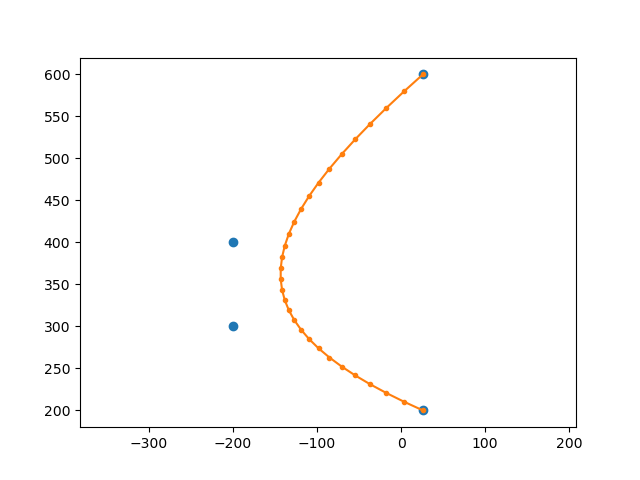

In [3]:
close()
plot()
axis("equal")

pt0, pt1, pt2, pt3 = (26, 200), (-200, 300), (-200, 400), (26, 600)
plot([pt0[0], pt1[0], pt2[0], pt3[0]], [pt0[1], pt1[1], pt2[1], pt3[1]], 'o')

xs, ys = get_points_c(pt0, pt1, pt2, pt3)
plot(xs, ys, '.-')

/tmp/ipykernel_119778/3448076153.py:1: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  close()


<IPython.core.display.Javascript object>


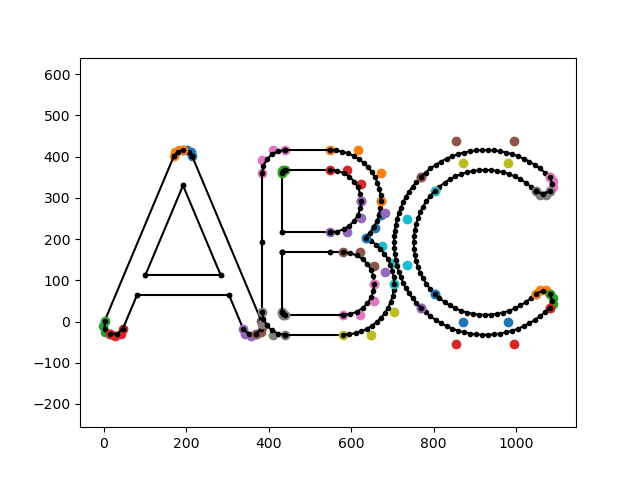

    moveTo (214.10000610351562, 401.29998779296875)
curveToOne (214.10000610351562, 401.29998779296875) (210.39999389648438, 410.20001220703125) (201.6999969482422, 416.0) (192.0, 416.0)
curveToOne (192.0, 416.0) (182.3000030517578, 416.0) (173.60000610351562, 410.20001220703125) (169.89999389648438, 401.29998779296875)
    lineTo (1.899993896484375, 1.29998779296875)
curveToOne (1.899993896484375, 1.29998779296875) (-3.20001220703125, -10.9000244140625) (2.4999847412109375, -25.0) (14.699981689453125, -30.100006103515625)
curveToOne (14.699981689453125, -30.100006103515625) (26.899978637695312, -35.20001220703125) (40.99998474121094, -29.5) (46.09999084472656, -17.300018310546875)
    lineTo (80.30000305175781, 64.0)
    lineTo (303.70001220703125, 64.0)
    lineTo (337.8000183105469, -17.29998779296875)
curveToOne (337.8000183105469, -17.29998779296875) (342.9000244140625, -29.5) (357.0000305175781, -35.29998779296875) (369.20001220703125, -30.0999755859375)
curveToOne (369.200012207

In [4]:
close()
plot()
axis("equal")

mp = CrtPen(gs, do_plot=True)

for gn in ('a', 'b', 'c'):
    g = gs[gn]
#     print(g.lsb, g.width, g._getGlyphAndOffset()[1])
# LSB-offset is already baked in by the BasePen
#     mp.lsb = -g.lsb
    g.draw(mp)
    mp.cursor[0] += g.width

# Generate code

In [51]:
mp = MyPen(gs, do_plot=False)

all_bs = bytes()
glyph_props = []

for c in arange(0x20, 0x20 + 95):
    name = cmap[c]
    g = gs[name]
    print(hex(c), chr(c), name)
    
    mp.reset()
    g.draw(mp)
    
    glyph_props.append({
#         "start_index": len(all_bs),
        "end_index": len(all_bs) + len(mp.bs),
        "adv_w": g.width,
#         "ofs_x": g.lsb
    })
    
    all_bs += mp.bs
    
len(all_bs)

0x20   space
0x21 ! exclam
0x22 " quotedbl
0x23 # numbersign
0x24 $ dollar
0x25 % percent
0x26 & ampersand
0x27 ' quotesingle
0x28 ( parenleft
0x29 ) parenright
0x2a * asterisk
0x2b + plus
0x2c , comma
0x2d - hyphen
0x2e . period
0x2f / slash
0x30 0 zero
0x31 1 one
0x32 2 two
0x33 3 three
0x34 4 four
0x35 5 five
0x36 6 six
0x37 7 seven
0x38 8 eight
0x39 9 nine
0x3a : colon
0x3b ; semicolon
0x3c < less
0x3d = equal
0x3e > greater
0x3f ? question
0x40 @ at
0x41 A A
0x42 B B
0x43 C C
0x44 D D
0x45 E E
0x46 F F
0x47 G G
0x48 H H
0x49 I I
0x4a J J
0x4b K K
0x4c L L
0x4d M M
0x4e N N
0x4f O O
0x50 P P
0x51 Q Q
0x52 R R
0x53 S S
0x54 T T
0x55 U U
0x56 V V
0x57 W W
0x58 X X
0x59 Y Y
0x5a Z Z
0x5b [ bracketleft
0x5c \ backslash
0x5d ] bracketright
0x5e ^ asciicircum
0x5f _ underscore
0x60 ` grave
0x61 a a
0x62 b b
0x63 c c
0x64 d d
0x65 e e
0x66 f f
0x67 g g
0x68 h h
0x69 i i
0x6a j j
0x6b k k
0x6c l l
0x6d m m
0x6e n n
0x6f o o
0x70 p p
0x71 q q
0x72 r r
0x73 s s
0x74 t t
0x75 u u
0x76 v v
0x7

11410

In [54]:
f = None
name = tt["name"].getBestFullName().lower()

print(f'''\
// -----------------------------------
//  {tt["name"].getBestFullName()} (.ttf font)
// -----------------------------------

static const uint8_t glyphs_{name}[{len(all_bs)}] = {{''', file=f)
print_table(all_bs, f=f)

print(f'''\
// GLYPH DESCRIPTION
static const glyph_dsc_t glyph_dsc_{name}[{len(glyph_props)}] = {{''', file=f)
for i, line in enumerate(glyph_props):
    print("    {" + ", ".join([f'.{k} = {v:5d}' for k, v in line.items()]) + f"}},  // '{chr(0x20 + i)}'", file=f)
print("};", file=f)

print(f'''
const font_t f_{name} = {{
    .units_per_em = {tt['head'].unitsPerEm},
    .n_glyphs = {len(glyph_props)},
    .glyphs = glyphs_{name},
    .glyph_dsc = glyph_dsc_{name},
}};
''', file=f)

# f.close()
# print('wrote', f.name)

// -----------------------------------
//  Lobster (.ttf font)
// -----------------------------------

static const uint8_t glyphs_lobster[11410] = {
 13,174,  2,219, 31,154, 21, 25,145,  0,231, 17, 85, 29, 76,  2,219,  9,142,  0, 74, 42, 33, 15,
 24, 23, 47, 23, 23,  5, 33, 37, 33,  7, 23, 23, 39, 23, 23,  2, 33, 34, 33,  3, 23, 23, 35, 23,
 24,  1, 33, 33, 33, 11, 23, 24, 43, 24, 23, 10, 33, 13,155,  2,240, 21,105, 19,110,232, 17, 70,
 31, 75,232,  5,157, 21,105, 19,110,232, 17, 70, 31, 75,232, 12,  1,225,  1,159, 19, 25,123, 21,
 94, 19, 15, 77, 17, 95, 19, 38,187, 17, 73, 31, 38,187, 17,129, 19, 38,187, 17, 73, 31, 38,187,
 17,105, 31, 15, 77, 21,105, 31, 25,123, 17,102, 31, 15, 77, 21,103, 31, 36,181, 21, 74, 19, 37,
181, 21,129, 31, 36,181, 21, 74, 19, 37,181, 21, 97, 19, 15, 77, 17, 97,  1, 74, 17,128, 19, 25,
123, 21,128, 31, 25,123, 12,  1,181,  2,133, 42, 24, 11, 11, 17, 43, 10, 16, 11, 20,  8, 19, 56,
244, 23, 23, 25, 39, 39, 41,  7, 24, 32, 39, 25, 31,  7, 17, 39, 39, 16, 3

  3, 57, 61, 35, 58, 60,  3, 55, 44, 23,  1,  3, 47, 18,  7, 15, 24,  6, 47, 25,  5,  5, 22, 37,
 25,  7, 35,  6, 39, 35,  6,  7,  9,  2, 31, 81,233, 21, 64, 19, 49,232, 47, 35, 13, 15, 28, 34,
 23,  3,  2, 39, 16, 28,  2, 27, 34, 39,  3, 30, 30, 35, 30, 30,  3, 47,  9, 15, 15,141, 42, 63,
 15, 36, 38, 47, 36, 39,  5, 58, 37, 61,  7, 10, 51, 35, 41,  5,  3, 25, 25, 35, 24, 24,  2, 39,
 34, 35,  7, 21, 20, 39, 21, 20,  5, 35, 37, 58, 15, 37, 52, 47, 37, 52, 10, 81, 42, 69, 11, 29,
 38, 43, 29, 37,  1, 52, 33, 53,  3, 78, 45, 27, 13,  9, 29, 77,  2,222, 39,113, 13,  5, 55, 37,
 91, 15, 83, 28, 39,  2, 22,  2, 11, 34, 52,  3, 28, 32, 35, 27, 32,  1, 60, 33, 23, 11, 32,  5,
 43, 32,  5, 11, 29,  6, 43, 25,  5, 11, 26,  4, 19, 40,181, 47, 65, 31,  5, 59, 37, 82,  7, 48,
 55, 39, 47, 56,  2, 95, 34, 81,  3, 35, 62, 35, 36, 62,  3, 64, 34, 35, 65, 35,  1, 84, 33, 88,
 11, 47, 38, 43, 47, 38, 10, 70, 13, 16,  1,  3, 42,134, 15, 46,113, 47, 47,112, 15, 80, 66, 47,
 80, 65,  5, 96, 37, 66,  7, 3

 62, 60, 47, 62, 61,  5, 94, 37,128,  2,160, 18,  1, 39,  3,  1,  5,  8, 37, 33, 15, 43, 17, 47,
 43, 18, 15, 35, 25, 23,  9, 27, 35, 29, 31,  3, 47, 21, 35, 46, 22,  3, 55,  9, 35,  8, 91,  3,
 33, 68, 35, 33, 68,  3, 52, 37, 35, 52, 37,  1, 61, 33, 74, 11, 43, 38, 43, 43, 38, 10, 82, 14,
  1, 46,140, 43, 27,  6, 10, 36, 42, 41, 15, 31, 13, 43,  2, 33, 11,  8, 13, 43,  8, 12,  1, 20,
 33, 33,  3, 31, 48, 35, 31, 48,  3, 19, 67, 35, 19, 67,  2, 51, 34, 48,  7, 11, 17, 39, 11, 16,
  5, 29, 37, 24, 15, 24, 28, 47, 24, 27, 15, 18, 47, 47, 18, 48, 15,  8, 58, 13, 76,  2, 25, 21,
144, 19, 16, 75, 47, 50, 43,  5, 67, 37, 56,  7, 33, 37, 39, 33, 37,  2, 84, 34, 79,  3, 23, 80,
 35, 23, 81,  3, 55, 57, 35, 55, 56,  1, 90, 33, 64, 11, 21, 36, 19, 52,244, 19,151, 36, 29,167,
  2, 25,  7,230,187, 42, 83,  1, 50, 33, 18,  3, 18, 13, 35, 19, 13,  3, 14, 23, 25, 59,  0,104,
 39,  8, 23,  5, 30, 37, 48, 15, 32, 45, 47, 31, 45, 15, 15, 63, 47, 14, 62, 10, 54, 15,239, 49,
 35, 51, 55,  1, 68, 33, 57, 1